# Musical Scales and the Circle of fifths

> I want to show how to compute scales and plot a circle of fifths

#### we should plot a polar plot

> I hope I can plot the Circle of Fifths that way someday

> underconstruction

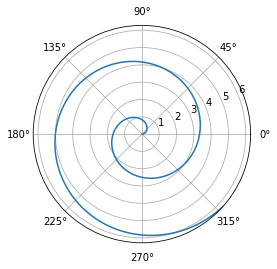

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2*np.pi, 0.01)
theta = .6 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2*np.pi)

plt.savefig("this.svg", bbox_inches='tight')

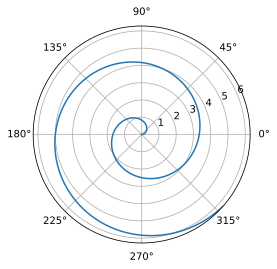

In [39]:
from IPython.display import Image, SVG, display
SVG("this.svg")

### since plotting `something which does not exist yet` is hard

> lets continue making some code for notes and scales

In [40]:
from musical.theory import Scale, Note, Chord

In [41]:
root = Note("F3")

In [42]:
fmaj = Scale(root, "major")

In [43]:
print(fmaj)

f - g - a - a# - c - d - e


In [44]:
scales = [
    Scale(Note("F2"), "major"),
    Scale(Note("D3"), "minor"),
    Scale(Note("C3"), "major"),
    Scale(Note("A3"), "major"),
    Scale(Note("D3"), "pentatonicminor"),
    Scale(Note("D4"), "major"),
    Scale(Note("F3"), "pentatonicminor"),
    Scale(Note("A#4"), "pentatonicminor"),
    Scale(Note("E4"), "pentatonicminor"),
    Scale(Note("G3"), "major"),
    Scale(Note("D#"), "pentatonicminor"),
    Scale(Note("D#"), "bluesminor"),
]

for sc in scales:
    print(sc.root.note, sc.scale_name[0], sc)
    


f major f - g - a - a# - c - d - e
d minor d - e - f - g - a - a# - c
c major c - d - e - f - g - a - b
a major a - b - c# - d - e - f# - g#
d pentatonicminor d - f - g - a - c
d major d - e - f# - g - a - b - c#
f pentatonicminor f - g# - a# - c - d#
a# pentatonicminor a# - c# - d# - f - g#
e pentatonicminor e - g - a - b - d
g major g - a - b - c - d - e - f#
d# pentatonicminor d# - f# - g# - a# - c#
d# bluesminor d# - f# - g# - a - a# - c#


In [45]:
pd.DataFrame([
    {"root": sc.root.note, "scale": sc.scale_name[0], "notes": str(sc).split(" - ")} 
    for sc in scales
])

,root,scale,notes
0,f,major,"[f, g, a, a#, c, d, e]"
1,d,minor,"[d, e, f, g, a, a#, c]"
2,c,major,"[c, d, e, f, g, a, b]"
3,a,major,"[a, b, c#, d, e, f#, g#]"
4,d,pentatonicminor,"[d, f, g, a, c]"
5,d,major,"[d, e, f#, g, a, b, c#]"
6,f,pentatonicminor,"[f, g#, a#, c, d#]"
7,a#,pentatonicminor,"[a#, c#, d#, f, g#]"
8,e,pentatonicminor,"[e, g, a, b, d]"
9,g,major,"[g, a, b, c, d, e, f#]"


## how similar are scales?
> lets try levenshtein distance to compare scales

In [46]:
def levenshtein_distance(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    
    return distances[len(token1)][len(token2)]

compare_with = scales[0]
for i, scale in enumerate(scales):
    print(f"### comparing '{scale.root} {scale.scale_name[0]}' with '{compare_with.root} {compare_with.scale_name[0]}' is {levenshtein_distance(str(scale), str(compare_with))}")
    

### comparing 'f0 major' with 'f0 major' is 0.0
### comparing 'd0 minor' with 'f0 major' is 9.0
### comparing 'c0 major' with 'f0 major' is 8.0
### comparing 'a0 major' with 'f0 major' is 11.0
### comparing 'd0 pentatonicminor' with 'f0 major' is 12.0
### comparing 'd0 major' with 'f0 major' is 10.0
### comparing 'f0 pentatonicminor' with 'f0 major' is 8.0
### comparing 'a#0 pentatonicminor' with 'f0 major' is 14.0
### comparing 'e0 pentatonicminor' with 'f0 major' is 11.0
### comparing 'g0 major' with 'f0 major' is 9.0
### comparing 'd#0 pentatonicminor' with 'f0 major' is 14.0
### comparing 'd#0 bluesminor' with 'f0 major' is 13.0


> note how Fmaj compares to Dmin and Cmaj.. Despite Dmin using the same notes as Fmaj, the computed distance is bigger than to Cmaj

> levenshtein was a bad attempt, there is no way levenshtein distance can reflect musical similarity, so we need a better comparison method.

### for now lets create an instrument database

In [47]:
from dataclasses import dataclass

@dataclass
class Instrument:
    name: str
    scale: Scale
    
    #def __repr__(self):
    #    return f"{self.name}, {self.scale}"
    

In [48]:
bass_duduk_f = Instrument("Bass Duduk F", Scale(Note("F2"), "major"))
duduk_f = Instrument("Duduk A", Scale(Note("A3"), "major"))
naf_d = Instrument("NA Flute D", Scale(Note("D3"), "pentatonicminor"))
naf_a1 = Instrument("NA Flute A", Scale(Note("A3"), "pentatonicminor"))
naf_a2 = Instrument("NA Flute A", Scale(Note("A5"), "pentatonicminor"))
naf_gis = Instrument("NA Flute G#", Scale(Note("G#4"), "pentatonicminor"))
naf_bb = Instrument("NA Flute Bb", Scale(Note("A#4"), "pentatonicminor"))
naf_f = Instrument("NA Flute F", Scale(Note("F4"), "pentatonicminor"))
naf_dis = Instrument("Flute D#", Scale(Note("D#4"), "pentatonicminor"))
whistle_d = Instrument("Low Tin Whistle D", Scale(Note("D4"), "major"))
zampona_g = Instrument("Zampona G", Scale(Note("G4"), "major"))
quena_e = Instrument("Quena E", Scale(Note("E4"), "pentatonicminor"))
whistle_bb = Instrument("Tin Whistle Bb", Scale(Note("A#4"), "major"))

# Instrument("Tin Whistle D", Scale(Note("D5"), "major")),
# Instrument("Sopilka C", Scale(Note("C5"), "chromatic")),
# Instrument("Alt Sopilka F", Scale(Note("F4"), "chromatic")),
# Instrument("Soprano Okarina C", Scale(Note("C6"), "chromatic")),
# Instrument("Trumpet Bb", Scale(Note("Bb2"), "chromatic")),

instruments = [bass_duduk_f, duduk_f, naf_d, naf_a1, naf_a2, naf_gis, naf_bb, 
               naf_f, naf_dis, whistle_d, zampona_g, quena_e, whistle_bb]

instruments

[Instrument(name='Bass Duduk F', scale=Scale(f0, (2, 2, 1, 2, 2, 2, 1))),
 Instrument(name='Duduk A', scale=Scale(a0, (2, 2, 1, 2, 2, 2, 1))),
 Instrument(name='NA Flute D', scale=Scale(d0, (3, 2, 2, 3, 2))),
 Instrument(name='NA Flute A', scale=Scale(a0, (3, 2, 2, 3, 2))),
 Instrument(name='NA Flute A', scale=Scale(a0, (3, 2, 2, 3, 2))),
 Instrument(name='NA Flute G#', scale=Scale(g#0, (3, 2, 2, 3, 2))),
 Instrument(name='NA Flute Bb', scale=Scale(a#0, (3, 2, 2, 3, 2))),
 Instrument(name='NA Flute F', scale=Scale(f0, (3, 2, 2, 3, 2))),
 Instrument(name='Flute D#', scale=Scale(d#0, (3, 2, 2, 3, 2))),
 Instrument(name='Low Tin Whistle D', scale=Scale(d0, (2, 2, 1, 2, 2, 2, 1))),
 Instrument(name='Zampona G', scale=Scale(g0, (2, 2, 1, 2, 2, 2, 1))),
 Instrument(name='Quena E', scale=Scale(e0, (3, 2, 2, 3, 2))),
 Instrument(name='Tin Whistle Bb', scale=Scale(a#0, (2, 2, 1, 2, 2, 2, 1)))]

### lets build some scale comparision functions

> we need to do better than levenshtein

#### first we create some helper functions

1. to get all notes from a scale
2. to compute set intersection for note sets from 2 scales

In [49]:
def notes_from_scale(Scale):
    return [Scale.get(i).note for i in range(len(Scale.intervals))]

def scales_shares_notes(A, B):
    return set(notes_from_scale(A)) & set(notes_from_scale(B))

Fmaj, Dmin = instruments[0].scale, instruments[2].scale

notes_from_scale(Fmaj)

['f', 'g', 'a', 'a#', 'c', 'd', 'e']

In [50]:
notes_from_scale(Dmin)

['d', 'f', 'g', 'a', 'c']

#### this function can tell us which notes are shared between the scales

In [51]:
scales_shares_notes(Dmin, Fmaj)

{'a', 'c', 'd', 'f', 'g'}

In [52]:
def find_similar_instrument(this, instruments, limit=5):
    found = []
    for candidate in [i for i in instruments if i != this]:
        shared = scales_shares_notes(this.scale, candidate.scale)
        found.append( (shared, candidate) )
        
    return sorted(found, key=lambda tup: len(tup[0]), reverse=True)[:limit]


In [53]:
for  i, ins in enumerate(instruments):
    print(i, ins)

0 Instrument(name='Bass Duduk F', scale=Scale(f0, (2, 2, 1, 2, 2, 2, 1)))
1 Instrument(name='Duduk A', scale=Scale(a0, (2, 2, 1, 2, 2, 2, 1)))
2 Instrument(name='NA Flute D', scale=Scale(d0, (3, 2, 2, 3, 2)))
3 Instrument(name='NA Flute A', scale=Scale(a0, (3, 2, 2, 3, 2)))
4 Instrument(name='NA Flute A', scale=Scale(a0, (3, 2, 2, 3, 2)))
5 Instrument(name='NA Flute G#', scale=Scale(g#0, (3, 2, 2, 3, 2)))
6 Instrument(name='NA Flute Bb', scale=Scale(a#0, (3, 2, 2, 3, 2)))
7 Instrument(name='NA Flute F', scale=Scale(f0, (3, 2, 2, 3, 2)))
8 Instrument(name='Flute D#', scale=Scale(d#0, (3, 2, 2, 3, 2)))
9 Instrument(name='Low Tin Whistle D', scale=Scale(d0, (2, 2, 1, 2, 2, 2, 1)))
10 Instrument(name='Zampona G', scale=Scale(g0, (2, 2, 1, 2, 2, 2, 1)))
11 Instrument(name='Quena E', scale=Scale(e0, (3, 2, 2, 3, 2)))
12 Instrument(name='Tin Whistle Bb', scale=Scale(a#0, (2, 2, 1, 2, 2, 2, 1)))


In [54]:
duduk_in_Fmaj = instruments[0]
duduk_in_Amaj = instruments[1]
zamp_in_Gmaj = instruments[10]
quena_in_Emin = instruments[11]

In [55]:
find_similar_instrument(duduk_in_Amaj, instruments, 3)

[({'a', 'b', 'c#', 'd', 'e', 'f#'},
  Instrument(name='Low Tin Whistle D', scale=Scale(d0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'a', 'b', 'd', 'e', 'f#'},
  Instrument(name='Zampona G', scale=Scale(g0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'b', 'c#', 'f#', 'g#'},
  Instrument(name='NA Flute G#', scale=Scale(g#0, (3, 2, 2, 3, 2))))]

In [56]:
find_similar_instrument(duduk_in_Fmaj, instruments, 3)

[({'a', 'a#', 'c', 'd', 'f', 'g'},
  Instrument(name='Tin Whistle Bb', scale=Scale(a#0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'a', 'c', 'd', 'f', 'g'},
  Instrument(name='NA Flute D', scale=Scale(d0, (3, 2, 2, 3, 2)))),
 ({'a', 'c', 'd', 'e', 'g'},
  Instrument(name='NA Flute A', scale=Scale(a0, (3, 2, 2, 3, 2))))]

In [57]:
find_similar_instrument(zamp_in_Gmaj, instruments, 3)

[({'a', 'b', 'd', 'e', 'f#', 'g'},
  Instrument(name='Low Tin Whistle D', scale=Scale(d0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'a', 'c', 'd', 'e', 'g'},
  Instrument(name='Bass Duduk F', scale=Scale(f0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'a', 'b', 'd', 'e', 'f#'},
  Instrument(name='Duduk A', scale=Scale(a0, (2, 2, 1, 2, 2, 2, 1))))]

In [58]:
find_similar_instrument(quena_in_Emin, instruments, 3)

[({'a', 'b', 'd', 'e', 'g'},
  Instrument(name='Low Tin Whistle D', scale=Scale(d0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'a', 'b', 'd', 'e', 'g'},
  Instrument(name='Zampona G', scale=Scale(g0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'a', 'd', 'e', 'g'},
  Instrument(name='Bass Duduk F', scale=Scale(f0, (2, 2, 1, 2, 2, 2, 1))))]

In [59]:
pd.DataFrame([
    {"name": i[1].name, "scale": i[1].scale.scale_name[0], "shared_notes": i[0]} 
    for i in find_similar_instrument(quena_in_Emin, instruments, 4)
])

,name,scale,shared_notes
0,Low Tin Whistle D,major,"{g, d, e, a, b}"
1,Zampona G,major,"{g, d, e, a, b}"
2,Bass Duduk F,major,"{e, d, a, g}"
3,Duduk A,major,"{e, d, a, b}"


In [60]:
def get_by_index(i, circle):
    return circle[i % len(circle)]

circle = [
    Scale(Note("C"), "major"), 
    Scale(Note("G"), "major"), 
    Scale(Note("D"), "major"), 
    Scale(Note("A"), "major"), 
    Scale(Note("E"), "major"), 
    Scale(Note("B"), "major"), 
    Scale(Note("F#"), "major"), 
    Scale(Note("Db"), "major"), 
    Scale(Note("Ab"), "major"), 
    Scale(Note("Eb"), "major"), 
    Scale(Note("Bb"), "major"), 
    Scale(Note("F"), "major"), 
]

In [61]:
get_by_index(4, circle)

Scale(e0, (2, 2, 1, 2, 2, 2, 1))

In [62]:
-12 % len(circle)

0

In [63]:
get_by_index(0, circle).root

Note('e0')

In [67]:
get_by_index(0, circle).root - get_by_index(1, circle).root

-7

In [65]:
get_by_index(1, circle).root - get_by_index(2, circle).root

5

In [68]:
get_by_index(2, circle).root - get_by_index(3, circle).root

-7

In [69]:
get_by_index(3, circle).root - get_by_index(4, circle).root

5

In [71]:
get_by_index(4, circle).root - get_by_index(5, circle).root

-7

In [73]:
for x in range(12):
    A, B = get_by_index(x, circle),  get_by_index(x+1, circle)
    print(A.root.note, "->", B.root.note, " = ", B.root - A.root)

c -> g  =  7
g -> d  =  -5
d -> a  =  7
a -> e  =  -5
e -> b  =  7
b -> f#  =  -5
f# -> c#  =  -5
c# -> g#  =  7
g# -> d#  =  -5
d# -> a#  =  7
a# -> f  =  -5
f -> c  =  -5


In [74]:
%%bash
pip install abjad abjad-ext-ipython


    ERROR: Command errored out with exit status 1:
     command: /usr/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-i1s4to14/abjad_6ddbaa601ef241008c5ee685ce637b7e/setup.py'"'"'; __file__='"'"'/tmp/pip-install-i1s4to14/abjad_6ddbaa601ef241008c5ee685ce637b7e/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-e2khq0ag
         cwd: /tmp/pip-install-i1s4to14/abjad_6ddbaa601ef241008c5ee685ce637b7e/
    Complete output (17 lines):
    
    Unsupported Python version
    
    This version of Abjad requires Python 3.10, but you're trying to
    install it on Python 3.9.
    
    This may be because you are using a version of pip that doesn't
    understand the python_requires classifier. Make sure you
    have pip >= 9.0 and setuptools >= 24.2, then try again:
    
        $ python -m pip i

    ERROR: Command errored out with exit status 1:
     command: /usr/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-i1s4to14/abjad_9c2b260d14474bb896f86efaf6466323/setup.py'"'"'; __file__='"'"'/tmp/pip-install-i1s4to14/abjad_9c2b260d14474bb896f86efaf6466323/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-zs_y6grs
         cwd: /tmp/pip-install-i1s4to14/abjad_9c2b260d14474bb896f86efaf6466323/
    Complete output (17 lines):
    
    Unsupported Python version
    
    This version of Abjad requires Python 3.10, but you're trying to
    install it on Python 3.9.
    
    This may be because you are using a version of pip that doesn't
    understand the python_requires classifier. Make sure you
    have pip >= 9.0 and setuptools >= 24.2, then try again:
    
        $ python -m pip i

  Using cached mccabe-0.6.1-py2.py3-none-any.whl (8.6 kB)


  Created wheel for uqbar: filename=uqbar-0.4.8-py3-none-any.whl size=82601 sha256=6772578e9a4999fecb4c74f4694195c517c6857075ece26d1894972597eb888b
  Stored in directory: /home/georgvomendt/.cache/pip/wheels/63/d7/aa/22fbc4783d140f094142f55b09a8f3438124ce84e14efde769
  Created wheel for abjad-ext-ipython: filename=abjad_ext_ipython-3.3-py3-none-any.whl size=3244 sha256=8387d7271bb21aa5627d6087fe3bc3c3dc37b3e5492166f56b20ec98d5260e90
  Stored in directory: /home/georgvomendt/.cache/pip/wheels/cc/f1/68/1e5f4f11228bd95a3fd4a2e44092003f24924e3d0469a456c9
  Created wheel for abjad: filename=abjad-3.3-py3-none-any.whl size=614014 sha256=30c94d9ff422890e25f338ceafab3b53b8f94818085a672e8cac37fd7aecbbcf
  Stored in directory: /home/georgvomendt/.cache/pip/wheels/94/db/f8/8ec437a714218fd6c36b55671745fe548a718ff7a6cc912547
Successfully built uqbar abjad-ext-ipython abjad


  Attempting uninstall: mccabe
    Found existing installation: mccabe 0.7.0
    Uninstalling mccabe-0.7.0:
      Successfully uninstalled mccabe-0.7.0


In [75]:
%load_ext abjadext.ipython

In [95]:
import abjad as ab

In [94]:
ab.show(ab.Staff([ ab.Note(get_by_index(x, circle).root.index, ab.Duration(1,4)) for x in range(12)] ))